In [38]:
import requests
import json
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import gmaps
import os
from config_car import api_key
from config_car import gkey

# Pull csv with business IDs
busIDs_file = 'restaurantIDs.csv'
bus_ids = pd.read_csv(busIDs_file)
bus_ids

ModuleNotFoundError: No module named 'gmaps'

In [11]:
names = list()
coordinates_lat = list()
coordinates_long = list()
indices = list()
categories = list()
review_count = list()
rating = list()
price = list()
transaction = list()
errors = list()
headers = {'Authorization': 'bearer %s' % api_key}

for idx,row in bus_ids.iterrows():
    try:
        bus_id = row.Business_ID
        url = f'https://api.yelp.com/v3/businesses/{bus_id}'
        resp = requests.get(url,headers=headers).json()
        indices.append(idx)
        names.append(resp['name'])
        coordinates_lat.append(resp['coordinates']['latitude'])
        coordinates_long.append(resp['coordinates']['longitude'])
        categories.append(resp['categories'][0]['alias'])
        review_count.append(resp['review_count'])
        rating.append(resp['rating'])
        price.append(resp['price'])
        transaction.append(resp['transactions'])
    except:
        errors.append(resp)
        print('uh oh')
        price.append('?')
        transaction.append('?')
        rating.append
        
restaurants_df = pd.DataFrame({
        'Index':indices,
        'Name':names,
        'Latitude': coordinates_lat,
        'Longitude': coordinates_long,
        'Categories':categories,
        'Total Reviews':review_count,
        'Rating':rating,
        'Price':price,
        'Services':transaction
    })

restaurants_df

uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh
uh oh


,Index,Name,Latitude,Longitude,Categories,Total Reviews,Rating,Price,Services
0,0,bb.q Chicken - Vernon Hills,42.240060,-87.941100,chickenshop,20,4.5,?,?
1,1,Poke Bros,42.182137,-87.929074,poke,5,4.5,?,?
2,2,Bonta,42.199130,-87.933020,cafes,499,4.5,$$,"[pickup, delivery]"
3,3,Lazy Dog Restaurant & Bar,42.244520,-87.945130,burgers,727,4.0,$$,"[delivery, pickup]"
4,4,Ramen House Shinchan,42.238635,-87.941136,ramen,73,4.0,$$,"[delivery, pickup]"
...,...,...,...,...,...,...,...,...,...
276,276,Starbucks,42.181664,-87.964806,coffee,32,3.0,$$,[delivery]
277,277,Starbucks,42.255691,-87.948152,coffee,25,2.0,$,[delivery]
278,278,Dunkin',42.197669,-88.019592,donuts,9,2.5,$,[delivery]
279,279,Starbucks,42.181968,-87.988867,coffee,21,3.5,$$,[delivery]


In [12]:
len(errors)

59

In [13]:
errors

[{'id': 'y6Y5M0sjwfPlDOOs4A_mcQ',
  'alias': 'bb-q-chicken-vernon-hills-vernon-hills',
  'name': 'bb.q Chicken - Vernon Hills',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/eJxvSevkvfonC6YtMTbKDw/o.jpg',
  'is_claimed': True,
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/bb-q-chicken-vernon-hills-vernon-hills?adjust_creative=62N3O5XycpomFSsmuVv6ww&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_lookup&utm_source=62N3O5XycpomFSsmuVv6ww',
  'phone': '+12244244915',
  'display_phone': '(224) 424-4915',
  'review_count': 20,
  'categories': [{'alias': 'chickenshop', 'title': 'Chicken Shop'},
   {'alias': 'korean', 'title': 'Korean'}],
  'rating': 4.5,
  'location': {'address1': '701 N Milwaukee Ave',
   'address2': 'Unit 348',
   'address3': '',
   'city': 'Vernon Hills',
   'zip_code': '60061',
   'country': 'US',
   'state': 'IL',
   'display_address': ['701 N Milwaukee Ave',
    'Unit 348',
    'Vernon Hills, IL 60061'],
   'cross_streets': ''},
  'coordinates'

In [14]:
restaurants_df.sample(10)

,Index,Name,Latitude,Longitude,Categories,Total Reviews,Rating,Price,Services
239,239,Yogen Fruz,42.203301,-87.934103,icecream,14,3.5,$,[]
211,211,Taco Bell,42.243677,-87.949775,mexican,3,1.0,$,[]
63,63,Prairie House Tavern,42.198109,-87.956441,bars,115,3.5,$$,"[pickup, delivery]"
179,179,Alef Sausage & Deli,42.241429,-87.998311,delis,18,3.5,$,[delivery]
153,153,Broken Earth Winery,42.179042,-87.997095,wineries,93,4.5,$$,[]
159,159,Sunset Foods,42.181000,-87.988200,grocery,59,3.5,$$$,[]
214,214,Papa John's Pizza,42.198410,-87.966229,pizza,18,1.5,$,"[delivery, pickup]"
174,174,Holcomb Hollow,42.259424,-87.986941,bakeries,7,4.5,?,?
66,66,Mambo Italiano,42.252286,-87.981057,italian,330,4.0,$$,"[delivery, pickup]"
71,71,Burt's Deli,42.263730,-87.949880,delis,160,4.5,$$,[]


In [44]:
category_list = restaurants_df['Categories'].unique()
category_list

array(['chickenshop', 'poke', 'cafes', 'burgers', 'ramen', 'mexican',
       'pizza', 'asianfusion', 'tacos', 'greek', 'tradamerican', 'sushi',
       'japanese', 'bbq', 'vietnamese', 'portuguese', 'hotdogs', 'korean',
       'foodtrucks', 'italian', 'newamerican', 'bars', 'breakfast_brunch',
       'icecream', 'hotdog', 'mediterranean', 'bakeries', 'mideastern',
       'coffee', 'caribbean', 'steak', 'sandwiches', 'chinese', 'salad',
       'beer_and_wine', 'delis', 'breweries', 'herbsandspices', 'pubs',
       'thai', 'meats', 'bubbletea', 'indpak', 'juicebars', 'seafood',
       'gourmet', 'grocery', 'noodles', 'fooddeliveryservices',
       'oliveoil', 'chicken_wings', 'tea', 'restaurants', 'markets',
       'cantonese', 'southern', 'customcakes', 'soup', 'wineries',
       'intlgrocery', 'farmersmarket', 'vegetarian', 'arcades',
       'convenience', 'donuts', 'importedfood', 'organic_stores',
       'chocolate', 'desserts', 'drugstores', 'artsandcrafts',
       'servicestations',

In [36]:
category_count = restaurants_df['Categories'].value_counts()
category_count

grocery       17
mexican       16
pizza         15
coffee        13
burgers       12
              ..
markets        1
tacos          1
salad          1
soup           1
vietnamese     1
Name: Categories, Length: 80, dtype: int64

In [28]:
services_count = restaurants_df['Services'].value_counts().copy
rating_count = restaurants_df['Rating'].value_counts()
rating_total = restaurants_df['Rating'].sum()
avg_review_count = restaurants_df['Total Reviews'].mean()

In [46]:
rating_count

3.5    65
3.0    52
4.0    50
4.5    33
2.0    24
2.5    21
5.0    14
1.5    13
1.0     9
Name: Rating, dtype: int64

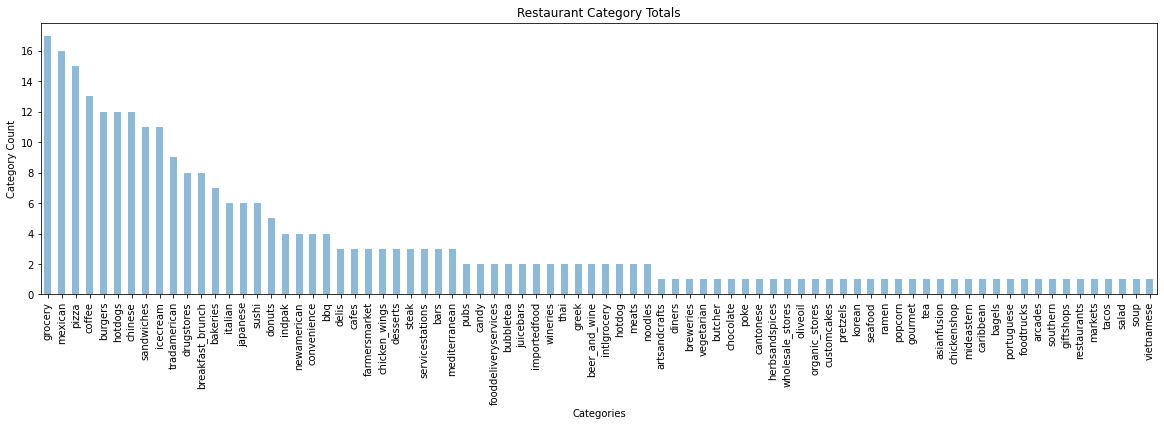

In [43]:
categories_bar= pd.DataFrame(category_count)
categories_bar.plot.bar(legend=False, alpha=0.5, align="center", figsize=(20,5))
plt.title('Restaurant Category Totals')
plt.xlabel('Categories')
plt.ylabel('Category Count')
plt.show()

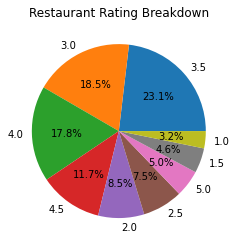

In [47]:
ratings_pie =pd.DataFrame(rating_count)
plt.pie(rating_count, labels=rating_count.index, autopct='%1.1f%%')
plt.title('Restaurant Rating Breakdown')
plt.show()